In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\cleaned_selected_data.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df.head()

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Ontario_Emigrants_International_Change_Rate,Ontario_In_migrant_Interprovincial_Change_Rate,Ontario_Out_migrant_Interprovincial_Change_Rate,UT_Graduate_Enrolment_Change_Rate,UT_Undergraduate_Enrolment_Change_Rate,Ryerson_Total_Enrolment_Change_Rate,York_Total_Enrolment_Change_Rate,Toronto_population_Change_Rate,Sales_Total_Change_Rate,Avg_Price_Month_Change_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,-0.174004,0.138135,0.054456,0.0,0.0,0.0,0.0,0.002472,0.386364,0.022788
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,0.102189,0.101048,0.098702,0.0,0.0,0.0,0.0,0.002166,0.263661,0.007819
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,0.396425,0.092984,0.151916,0.0,0.0,0.0,0.0,0.002325,-0.096216,-0.008740
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,0.485221,0.074435,0.173189,0.0,0.0,0.0,0.0,0.002177,0.145933,0.009777


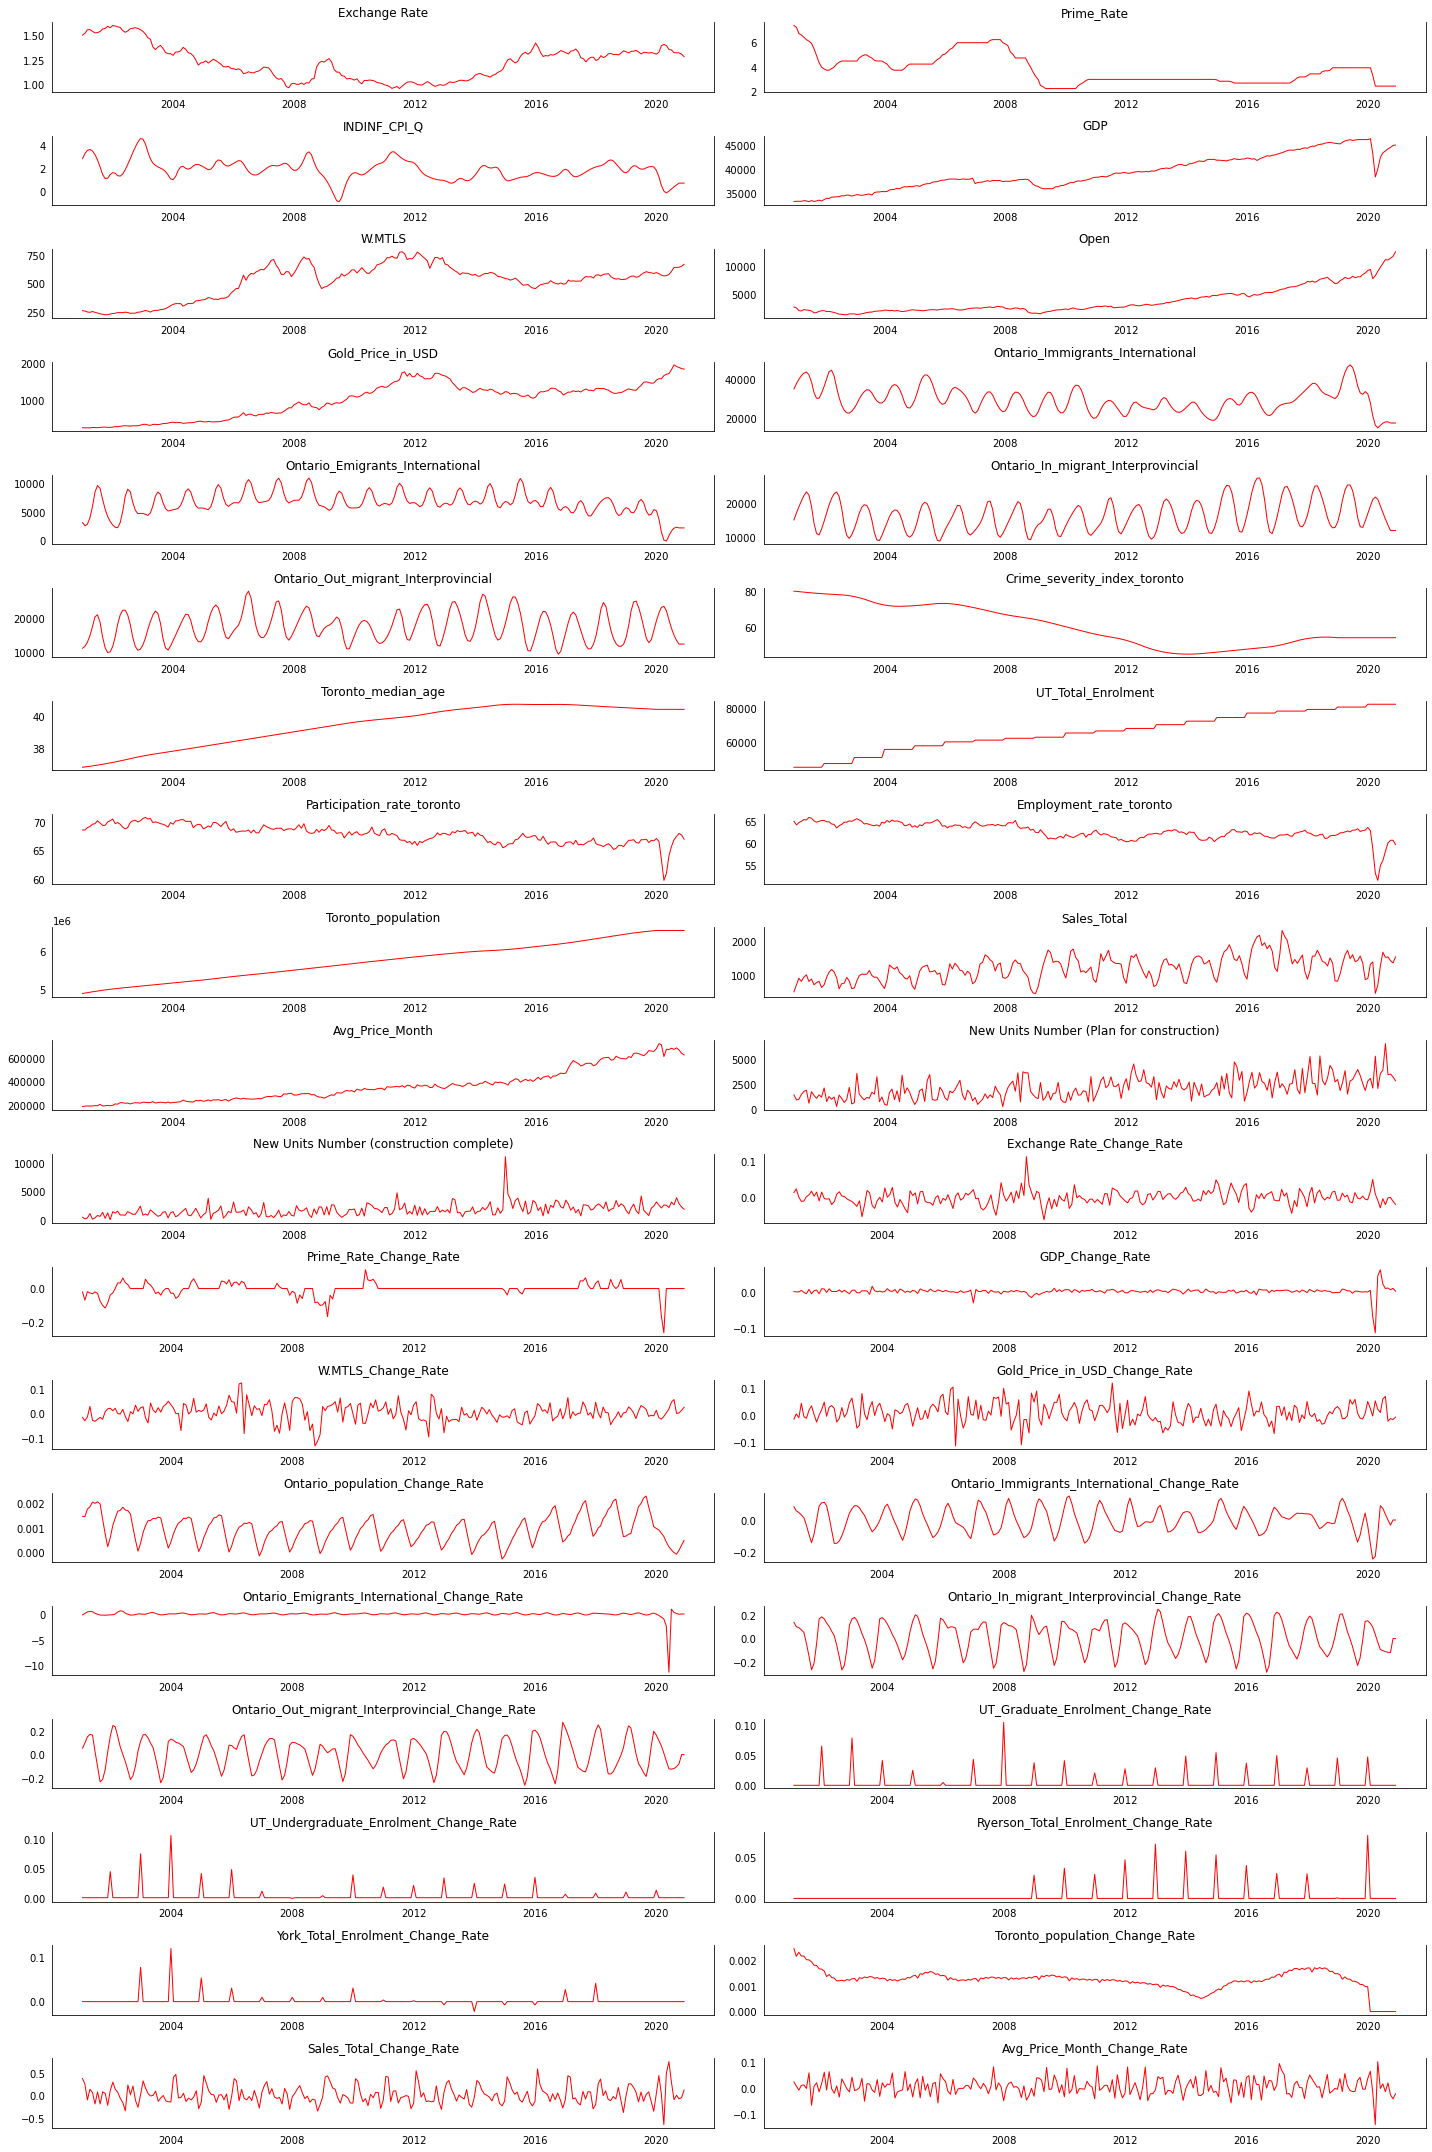

In [4]:
# Plot
fig, axes = plt.subplots(nrows=19, ncols=2, figsize=(20,30))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

plt.tight_layout();

In [5]:
for col in df.columns:
    if "Change_Rate" in col:
        df.drop(columns=[col], inplace=True)

In [6]:
df

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,80.040000,36.800000,45261,68.6,65.0,4882618.000,528,185757.6686,1457,511
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,79.883354,36.820147,45261,68.6,64.2,4894687.054,732,189990.7036,946,227
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,79.746533,36.839195,45261,69.0,64.7,4905287.460,925,191476.2205,1015,387
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,79.600220,36.861226,45261,69.2,65.0,4916690.735,836,189802.6914,1503,1151
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,79.463797,36.883489,45261,69.6,65.4,4927393.091,958,191658.3372,1810,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,1.323456,2.450,0.380368,43904.52149,641.6550,11188.406810,1966.617619,17844.25527,2164.615160,15412.26311,...,54.180000,40.400000,82311,66.9,58.2,6555205.000,1536,673173.9453,6618,2689
2020-09-01,1.321741,2.450,0.548652,44363.54588,642.2860,11119.767620,1922.101364,17850.99984,2346.044135,13622.70035,...,54.180000,40.400000,82311,67.5,60.1,6555205.000,1549,686191.4216,3490,3922
2020-10-01,1.321338,2.450,0.700000,44628.00813,644.0925,11455.091750,1897.330909,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,82311,68.0,60.7,6555205.000,1438,668160.6273,3550,2872


In [7]:
df["Date"] = df.index
df["Month"] = df.apply(lambda x: str(x["Date"]).split("-")[1], axis=1)
df["Month"] = df["Month"].astype("float64")
df.drop(columns=["Date"], inplace=True)

In [8]:
df.columns

Index(['Exchange Rate', 'Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Gold_Price_in_USD', 'Ontario_Immigrants_International',
       'Ontario_Emigrants_International', 'Ontario_In_migrant_Interprovincial',
       'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto',
       'Toronto_median_age', 'UT_Total_Enrolment',
       'Participation_rate_toronto', 'Employment_rate_toronto',
       'Toronto_population', 'Sales_Total', 'Avg_Price_Month',
       'New Units Number (Plan for construction)',
       'New Units Number (construction complete)', 'Month'],
      dtype='object')

In [9]:
df.drop(columns=["Exchange Rate", "Gold_Price_in_USD", "Ontario_Emigrants_International", "Ontario_Emigrants_International", 
                 "Ontario_In_migrant_Interprovincial", 'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto'], inplace = True)

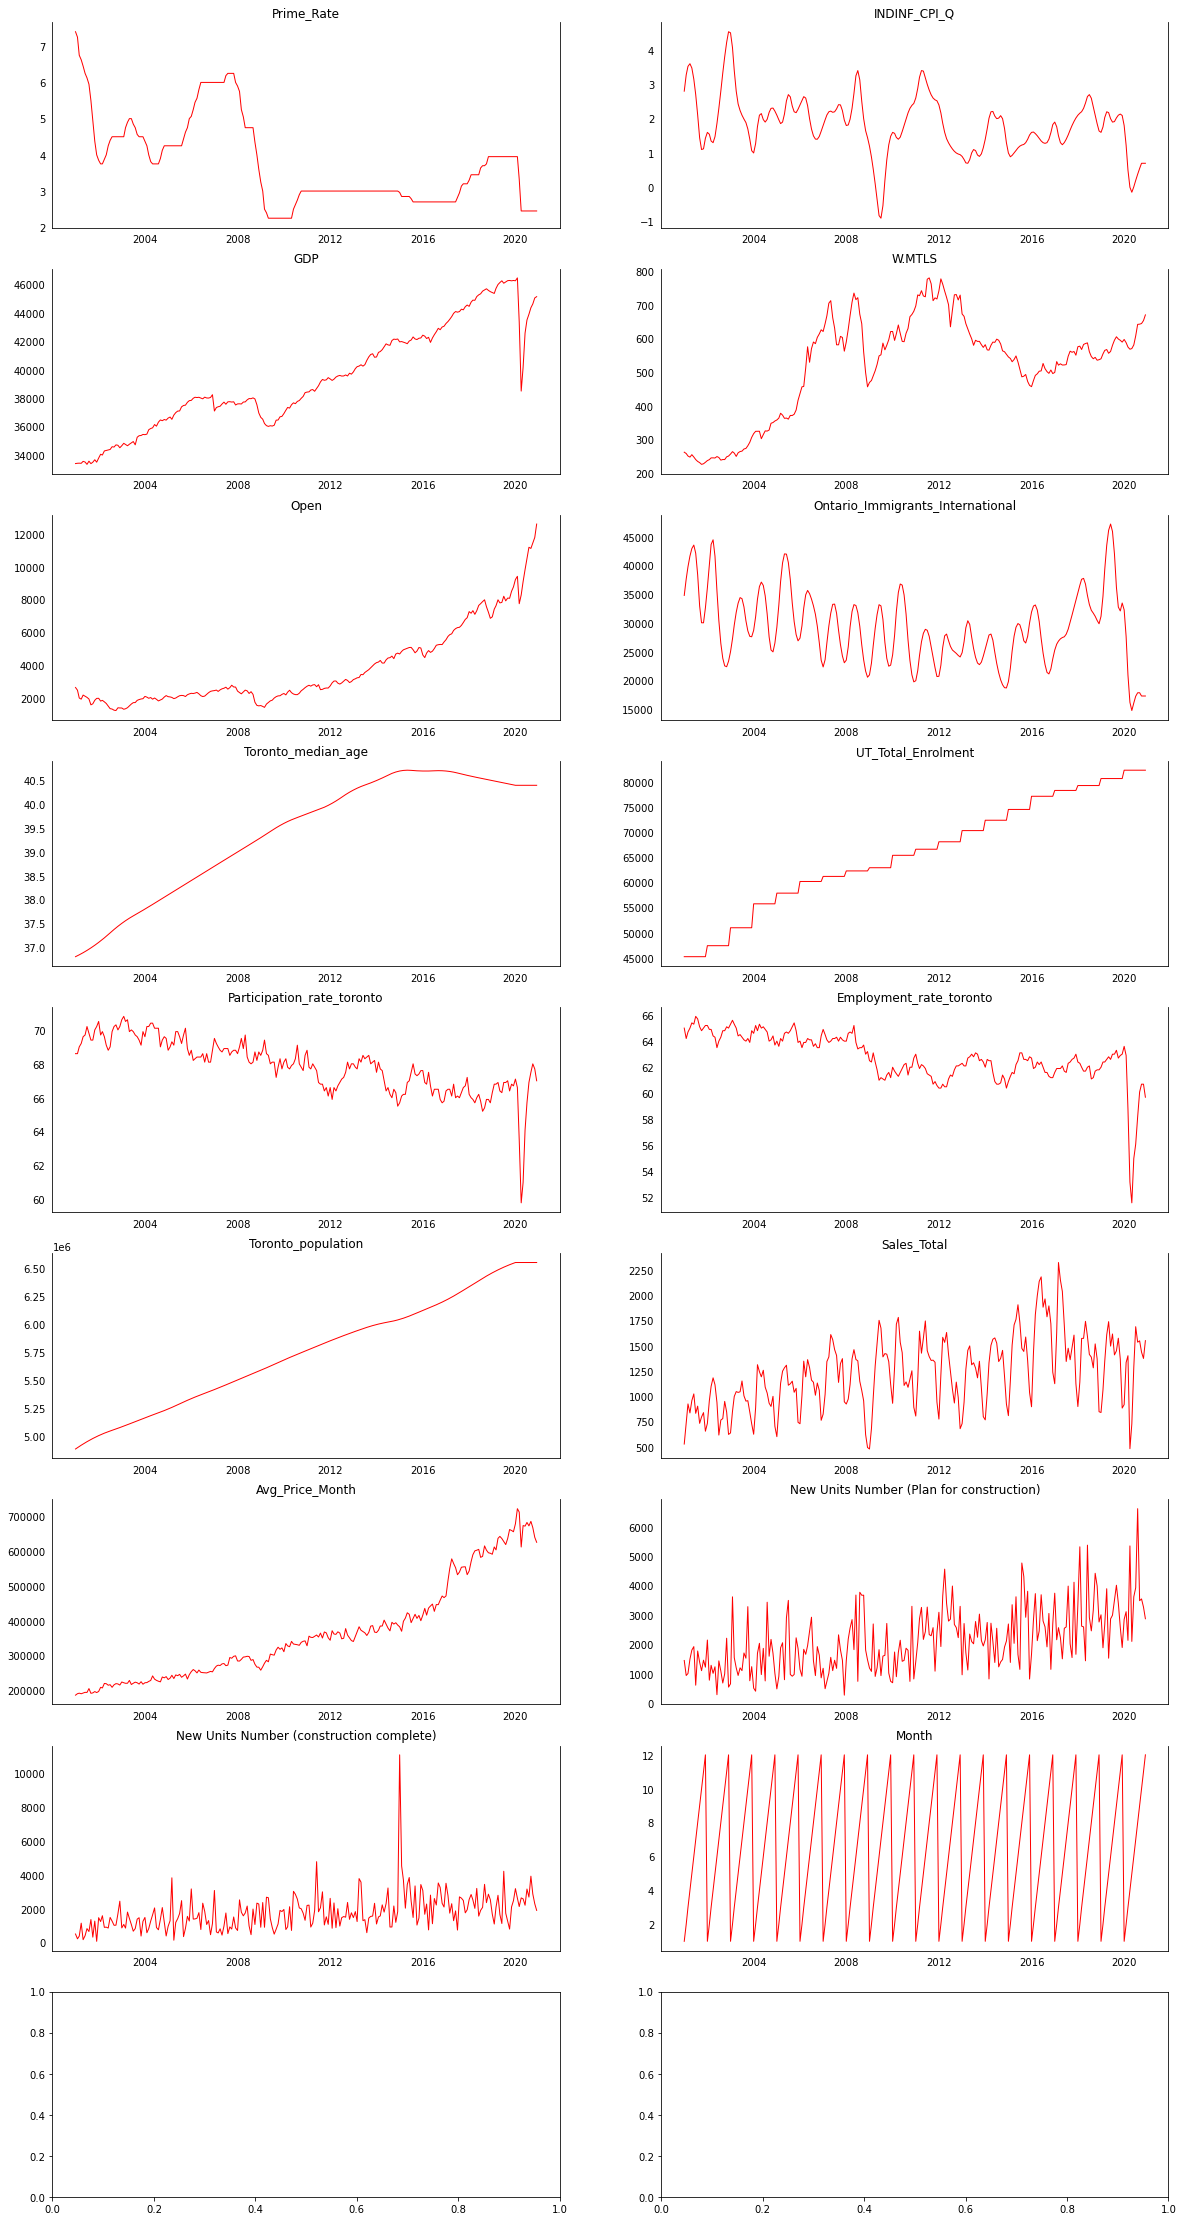

In [10]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, figsize=(20,40))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
    
except:
    pass


In [11]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

In [12]:
# df_target = pd.DataFrame()
# df_target["Avg_Price_Month"] = df["Avg_Price_Month"]
# df.drop(columns = ["Avg_Price_Month"], inplace=True)

In [13]:
# df_scaled = StandardScaler().fit_transform(df)
# print(df_scaled[0:5])

In [14]:
# pca = PCA(n_components=8)

In [15]:
# df_pca = pca.fit_transform(df_scaled)

In [16]:
# df_pca_fit = pd.DataFrame(data = df_pca)
# df_pca_fit.head()

In [17]:
# pca.explained_variance_ratio_

In [18]:
# df_target["Avg_Price_Month"]

In [19]:
# df_pca_fit.index = df_target.index

In [20]:
# df_pca_fit["Avg_Price_Month"] = df_target["Avg_Price_Month"]

In [21]:
# df_pca_fit

In [22]:
# try:
#     # Plot
#     fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30))
#     for i, ax in enumerate(axes.flatten()):
#         data = df_pca_fit[df_pca_fit.columns[i]]
#         ax.plot(data, color='red', linewidth=1)
#         # Decorations
#         ax.set_title(df_pca_fit.columns[i])
#         ax.xaxis.set_ticks_position('none')
#         ax.yaxis.set_ticks_position('none')
#         ax.spines["top"].set_alpha(0)
#     #     ax.tick_params(labelsize=6)

#     plt.tight_layout();
# except:
#     pass

In [23]:
# df = df_pca_fit.copy()

In [24]:
# df["Avg_Price_Month"] = df["Avg_Price_Month"]/100000

In [25]:
df

,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Ontario_Immigrants_International,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Month
Date,,,,,,,,,,,,,,,,
2001-01-01,7.400,2.800000,33393.91068,262.1820,2641.687163,34801.00000,36.800000,45261,68.6,65.0,4882618.000,528,185757.6686,1457,511,1.0
2001-02-01,7.250,3.274302,33414.60595,258.2500,2474.819966,37662.09142,36.820147,45261,68.6,64.2,4894687.054,732,189990.7036,946,227,2.0
2001-03-01,6.750,3.523191,33421.15412,250.7975,1999.363187,39796.62476,36.839195,45261,69.0,64.7,4905287.460,925,191476.2205,1015,387,3.0
2001-04-01,6.625,3.600000,33411.95797,247.6000,1929.581512,41662.00000,36.861226,45261,69.2,65.0,4916690.735,836,189802.6914,1503,1151,4.0
2001-05-01,6.450,3.475476,33549.86515,254.8020,2178.740467,42969.07156,36.883489,45261,69.6,65.4,4927393.091,958,191658.3372,1810,175,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,2.450,0.380368,43904.52149,641.6550,11188.406810,17844.25527,40.400000,82311,66.9,58.2,6555205.000,1536,673173.9453,6618,2689,8.0
2020-09-01,2.450,0.548652,44363.54588,642.2860,11119.767620,17850.99984,40.400000,82311,67.5,60.1,6555205.000,1549,686191.4216,3490,3922,9.0
2020-10-01,2.450,0.700000,44628.00813,644.0925,11455.091750,17281.00000,40.400000,82311,68.0,60.7,6555205.000,1438,668160.6273,3550,2872,10.0


In [26]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,Prime_Rate_x,INDINF_CPI_Q_x,GDP_x,W.MTLS_x,Open_x,Ontario_Immigrants_International_x,Toronto_median_age_x,UT_Total_Enrolment_x,Participation_rate_toronto_x,Employment_rate_toronto_x,Toronto_population_x,Sales_Total_x,Avg_Price_Month_x,New Units Number (Plan for construction)_x,New Units Number (construction complete)_x,Month_x
Prime_Rate_y,1.0000,0.0000,0.0256,0.0377,0.0000,0.0001,0.0000,0.1247,0.2038,0.0236,0.0000,0.0044,0.0006,0.0139,0.2971,0.0216
INDINF_CPI_Q_y,0.0059,1.0000,0.0212,0.0047,0.0194,0.1088,0.0135,0.0183,0.0129,0.0078,0.0070,0.3301,0.0211,0.0205,0.3577,0.5538
GDP_y,0.0064,0.0005,1.0000,0.2711,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0250,0.0000,0.0052,0.0902,0.0200
W.MTLS_y,0.4796,0.1119,0.4981,1.0000,0.5420,0.0821,0.4124,0.4179,0.5525,0.1466,0.5607,0.0606,0.5783,0.0683,0.4334,0.1319
Open_y,0.0051,0.0056,0.0000,0.2906,1.0000,0.0000,0.0000,0.5670,0.0223,0.0000,0.0000,0.3029,0.0013,0.2708,0.0123,0.3280
Ontario_Immigrants_International_y,0.0000,0.1048,0.0048,0.0000,0.0000,1.0000,0.0000,0.0000,0.0017,0.0000,0.0000,0.0000,0.1010,0.0608,0.0036,0.0000
Toronto_median_age_y,0.0027,0.0069,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0114,0.0000,0.0330,0.0000,0.0006,0.0573,0.0000
UT_Total_Enrolment_y,0.0882,0.9100,0.1092,0.0008,0.5694,0.0000,0.0000,1.0000,0.7480,0.9601,0.0000,0.0000,0.0317,0.0341,0.3032,0.0000
Participation_rate_toronto_y,0.0000,0.0198,0.0000,0.0203,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0019,0.0000,0.1422,0.0100,0.2156
Employment_rate_toronto_y,0.0000,0.0023,0.0000,0.0041,0.0000,0.0000,0.0000,0.0000,0.0006,1.0000,0.0000,0.0401,0.0000,0.0689,0.0210,0.1115


In [27]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Prime_Rate ::  984.25    > nan       =>   False
INDINF_CPI_Q ::  805.13    > nan       =>   False
GDP    ::  674.28    > nan       =>   False
W.MTLS ::  552.53    > nan       =>   False
Open   ::  445.72    > 311.1288  =>   True
Ontario_Immigrants_International ::  365.76    > 263.2603  =>   True
Toronto_median_age ::  289.75    > 219.4051  =>   True
UT_Total_Enrolment ::  223.95    > 179.5199  =>   True
Participation_rate_toronto ::  169.52    > 143.6691  =>   True
Employment_rate_toronto ::  122.12    > 111.7797  =>   True
Toronto_population ::  85.1      > 83.9383   =>   True
Sales_Total ::  56.73     > 60.0627   =>   False
Avg_Price_Month ::  35.53     > 40.1749   =>   False
New Units Number (Plan for construction) ::  18.0      > 24.2761   =>   False
New Units Number (construction complete) ::  7.23      > 12.3212   =>   False
Month  ::  0.15      > 4.1296    =>   False


C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:579: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  category=HypothesisTestWarning)


In [28]:
nobs = 40
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(200, 16)
(40, 16)


In [29]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [30]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Prime_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.432
 No. Lags Chosen       = 5
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.1329. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "INDINF_CPI_Q" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0871
 No. Lags Chosen       = 9
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0275. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-St

In [31]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [32]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Prime_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.1665
 No. Lags Chosen       = 4
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0008. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "INDINF_CPI_Q" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.75
 No. Lags Chosen       = 7
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Le

In [33]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [34]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Prime_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.3075
 No. Lags Chosen       = 5
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "INDINF_CPI_Q" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.8872
 No. Lags Chosen       = 14
 Critical value 1%     = -3.467
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Le

In [35]:
df_differenced

,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Ontario_Immigrants_International,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Month
Date,,,,,,,,,,,,,,,,
2001-03-01,-0.350,-0.225413,-14.14710,-3.5205,-308.589582,-726.55808,-0.001099,0.0,0.4,1.3,-1468.648,-11.0,-2747.5181,580.0,444.0,0.0
2001-04-01,0.375,-0.172080,-15.74432,4.2550,405.675104,-269.15810,0.002983,0.0,-0.2,-0.2,802.869,-282.0,-3159.0460,419.0,604.0,0.0
2001-05-01,-0.050,-0.201333,147.10333,10.3995,318.940630,-558.30368,0.000232,0.0,0.2,0.1,-700.919,211.0,3529.1749,-181.0,-1740.0,0.0
2001-06-01,-0.025,-0.200244,-187.11033,-14.0915,-317.235121,-699.06086,0.001716,0.0,-0.3,-0.5,12.572,-56.0,386.3656,-189.0,1212.0,0.0
2001-07-01,0.075,-0.125941,-114.51489,-0.7705,-3.424340,-2033.09296,0.000169,0.0,0.4,0.7,-678.715,-258.0,-2628.9393,-1429.0,184.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-01,0.000,0.065727,35.74217,14.5560,-54.237415,-141.16790,-0.001566,0.0,-0.4,0.0,1158.117,-868.0,-6895.1624,-754.0,1595.0,0.0
2017-05-01,0.000,0.140098,35.52148,-7.6400,154.087707,-174.97996,-0.000815,0.0,1.1,0.2,-60.717,66.0,-41452.3044,-374.0,-1559.0,0.0
2017-06-01,0.000,0.121679,-101.01045,3.9265,-98.087146,-87.70755,-0.001309,0.0,-1.5,-0.6,577.533,-226.0,1343.6890,1756.0,1582.0,0.0


In [36]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  98.22899782254684
BIC :  102.76215220943382
FPE :  4.605767042277193e+42
HQIC:  100.06405253422571 

Lag Order = 2
AIC :  95.7463062922281
BIC :  104.57714578240011
FPE :  4.023335244214826e+41
HQIC:  99.321453351923 

Lag Order = 3
AIC :  95.13171768785804
BIC :  108.29085437459639
FPE :  2.4637606235886887e+41
HQIC:  100.4596962666917 

Lag Order = 4
AIC :  94.39513834727192
BIC :  111.9135532206011
FPE :  1.5215819761108486e+41
HQIC:  101.48883744883948 

Lag Order = 5
AIC :  92.83442958541445
BIC :  114.74347872956332
FPE :  5.028098162304201e+40
HQIC:  101.70689042520046 

Lag Order = 6
AIC :  91.4137319538325
BIC :  117.74515287772373
FPE :  2.5714200928084547e+40
HQIC:  102.0781503852213 

Lag Order = 7
AIC :  89.62027621098159
BIC :  120.40619431521357
FPE :  1.419120500541345e+40
HQIC:  102.09000519891217 



C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [37]:
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,103.9,104.2,1.355e+45,104.0
1,98.10,102.8*,4.046e+42,100.0
2,95.62,104.7,3.588e+41,99.31
3,95.03,108.5,2.268e+41,100.5
4,94.23,112.1,1.343e+41,101.5
5,92.43,114.7,3.623e+40,101.5
6,91.10,117.8,2.113e+40,101.9
7,89.14,120.3,1.036e+40,101.7
8,87.00,122.5,8.504e+39,101.4
9,83.39,123.3,5.268e+39,99.57


In [38]:

model_fitted = model.fit(8)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 03, Jun, 2021
Time:                     02:10:34
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                    122.656
Nobs:                     190.000    HQIC:                   101.671
Log likelihood:          -10551.0    FPE:                1.02255e+40
AIC:                      87.3829    Det(Omega_mle):     2.56503e+36
--------------------------------------------------------------------
Results for equation Prime_Rate
                                                 coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------
const                                               0.003572         0.006196            0.577           0.564
L1.Prime_Rate                                 

In [39]:
def adjust(val, length= 6): return str(val).ljust(length)

In [40]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Prime_Rate : 1.93
INDINF_CPI_Q : 1.73
GDP    : 1.94
W.MTLS : 2.04
Open   : 1.98
Ontario_Immigrants_International : 1.99
Toronto_median_age : 2.0
UT_Total_Enrolment : 2.09
Participation_rate_toronto : 2.09
Employment_rate_toronto : 2.11
Toronto_population : 2.03
Sales_Total : 1.98
Avg_Price_Month : 1.94
New Units Number (Plan for construction) : 2.18
New Units Number (construction complete) : 2.07
Month  : 2.25


In [41]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

8


array([[ 0.00000000e+00, -1.61354841e-01,  1.41005800e+02,
         1.39915000e+01, -1.96611900e+01, -2.28393430e+02,
        -1.13953000e-03,  1.16100000e+03,  5.00000000e-01,
         4.00000000e-01,  5.36264000e+02,  3.67000000e+02,
         9.48183780e+03, -5.06000000e+02,  1.62200000e+03,
        -1.20000000e+01],
       [ 0.00000000e+00, -2.08683917e-01, -5.76678200e+01,
         2.88200000e+01,  6.07531080e+01, -4.95761680e+02,
        -1.07969000e-03, -1.16100000e+03, -5.00000000e-01,
        -1.00000000e-01,  2.62645000e+02,  6.20000000e+02,
         3.91971589e+04, -2.62500000e+03, -2.12500000e+03,
         1.20000000e+01],
       [ 0.00000000e+00, -1.30731636e-01,  2.01602700e+01,
        -4.27905000e+01, -9.25141450e+01, -4.92690480e+02,
        -4.88940000e-04,  0.00000000e+00, -1.00000000e-01,
        -3.00000000e-01, -6.58245000e+02,  1.85000000e+02,
        -9.13944110e+03,  1.99400000e+03, -3.16000000e+02,
         0.00000000e+00],
       [ 0.00000000e+00,  6.57267360e

In [42]:
col_list = list()
for col in df.columns:
    col_list.append(str(col))
df.columns = col_list 

In [43]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Prime_Rate_2d,INDINF_CPI_Q_2d,GDP_2d,W.MTLS_2d,Open_2d,Ontario_Immigrants_International_2d,Toronto_median_age_2d,UT_Total_Enrolment_2d,Participation_rate_toronto_2d,Employment_rate_toronto_2d,Toronto_population_2d,Sales_Total_2d,Avg_Price_Month_2d,New Units Number (Plan for construction)_2d,New Units Number (construction complete)_2d,Month_2d
Date,,,,,,,,,,,,,,,,
2017-09-01,-0.123452,-0.211972,-153.585106,-55.171124,68.000006,1080.991804,-0.001971,202.774813,1.199657,0.164316,375.139872,-389.989614,-16562.933716,-3298.706270,1111.283496,-4.217088
2017-10-01,-0.125280,-0.155595,318.575944,14.341621,-254.127456,652.319307,-0.002140,-6.011530,-1.576995,-1.643578,-263.226169,438.744183,61081.009488,827.653260,-9621.911698,5.398166
2017-11-01,0.002204,-0.362975,-245.101939,-22.188677,167.760158,-538.298434,-0.000589,-732.651799,-0.638443,-0.647261,352.327013,119.017576,-33324.279676,1615.655286,10542.155609,-4.349140
2017-12-01,-0.068867,-0.026099,306.009904,61.544116,178.032574,-2305.358874,0.000126,1134.042432,-0.379819,0.005513,22.205349,-406.912256,-14786.665459,-1319.872318,-5654.440903,4.436727
2018-01-01,-0.116134,-0.189686,-182.426484,-43.275249,21.416016,-902.954332,0.000002,560.719785,1.956365,1.768487,16.089325,178.368900,-25895.300872,2317.194719,5093.252919,-11.606034
2018-02-01,0.193004,0.138459,42.964093,-2.620513,-134.159797,-418.204686,0.000041,-2068.396577,-1.242214,-0.553005,405.349411,55.805908,38934.898290,-4017.056567,-6745.582398,16.856002
2018-03-01,0.066566,0.090648,-402.425614,-17.547325,-20.822726,1098.996118,-0.001174,907.988934,2.131631,1.929116,-761.916930,-136.233935,-26864.579755,5186.853315,3934.821885,-8.379612
2018-04-01,-0.034273,0.337688,100.230629,57.781969,-119.987591,519.498866,0.002283,22.683641,-1.536421,-2.540953,1345.801651,-57.867208,32606.555970,-3221.395115,-748.229165,-0.056276
2018-05-01,0.027449,0.076668,242.389026,24.359103,379.608245,1523.270967,-0.001221,322.995994,-0.655158,0.147129,-783.776699,61.718228,-18686.584673,-726.258938,-427.732436,-0.012564


In [44]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [45]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results

,Prime_Rate_2d,INDINF_CPI_Q_2d,GDP_2d,W.MTLS_2d,Open_2d,Ontario_Immigrants_International_2d,Toronto_median_age_2d,UT_Total_Enrolment_2d,Participation_rate_toronto_2d,Employment_rate_toronto_2d,...,Sales_Total_1d,Sales_Total_forecast,Avg_Price_Month_1d,Avg_Price_Month_forecast,New Units Number (Plan for construction)_1d,New Units Number (Plan for construction)_forecast,New Units Number (construction complete)_1d,New Units Number (construction complete)_forecast,Month_1d,Month_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,-0.123452,-0.211972,-153.585106,-55.171124,68.000006,1080.991804,-0.001971,202.774813,1.199657,0.164316,...,-258.989614,1217.010386,-8896.146916,531272.622084,-1909.706270,2076.293730,3069.283496,5770.283496,-3.217088,4.782912
2017-10-01,-0.125280,-0.155595,318.575944,14.341621,-254.127456,652.319307,-0.002140,-6.011530,-1.576995,-1.643578,...,179.754568,1396.764954,52184.862572,583457.484656,-1082.053010,994.240720,-6552.628202,-782.344706,2.181078,6.963990
2017-11-01,0.002204,-0.362975,-245.101939,-22.188677,167.760158,-538.298434,-0.000589,-732.651799,-0.638443,-0.647261,...,298.772144,1695.537098,18860.582896,602318.067553,533.602276,1527.842995,3989.527407,3207.182701,-2.168062,4.795927
2017-12-01,-0.068867,-0.026099,306.009904,61.544116,178.032574,-2305.358874,0.000126,1134.042432,-0.379819,0.005513,...,-108.140112,1587.396986,4073.917437,606391.984990,-786.270042,741.572953,-1664.913496,1542.269206,2.268665,7.064593
2018-01-01,-0.116134,-0.189686,-182.426484,-43.275249,21.416016,-902.954332,0.000002,560.719785,1.956365,1.768487,...,70.228787,1657.625773,-21821.383435,584570.601555,1530.924676,2272.497629,3428.339424,4970.608630,-9.337369,-2.272776
2018-02-01,0.193004,0.138459,42.964093,-2.620513,-134.159797,-418.204686,0.000041,-2068.396577,-1.242214,-0.553005,...,126.034695,1783.660468,17113.514855,601684.116410,-2486.131890,-213.634261,-3317.242974,1653.365656,7.518633,5.245857
2018-03-01,0.066566,0.090648,-402.425614,-17.547325,-20.822726,1098.996118,-0.001174,907.988934,2.131631,1.929116,...,-10.199240,1773.461228,-9751.064900,591933.051510,2700.721425,2487.087164,617.578911,2270.944567,-0.860979,4.384878
2018-04-01,-0.034273,0.337688,100.230629,57.781969,-119.987591,519.498866,0.002283,22.683641,-1.536421,-2.540953,...,-68.066447,1705.394781,22855.491070,614788.542580,-520.673691,1966.413473,-130.650254,2140.294313,-0.917255,3.467623
2018-05-01,0.027449,0.076668,242.389026,24.359103,379.608245,1523.270967,-0.001221,322.995994,-0.655158,0.147129,...,-6.348220,1699.046561,4168.906397,618957.448977,-1246.932629,719.480844,-558.382691,1581.911622,-0.929819,2.537804


In [46]:
col_list = list()
for col in df_test.columns:
    col_list.append(str(col))
df_test.columns = col_list 

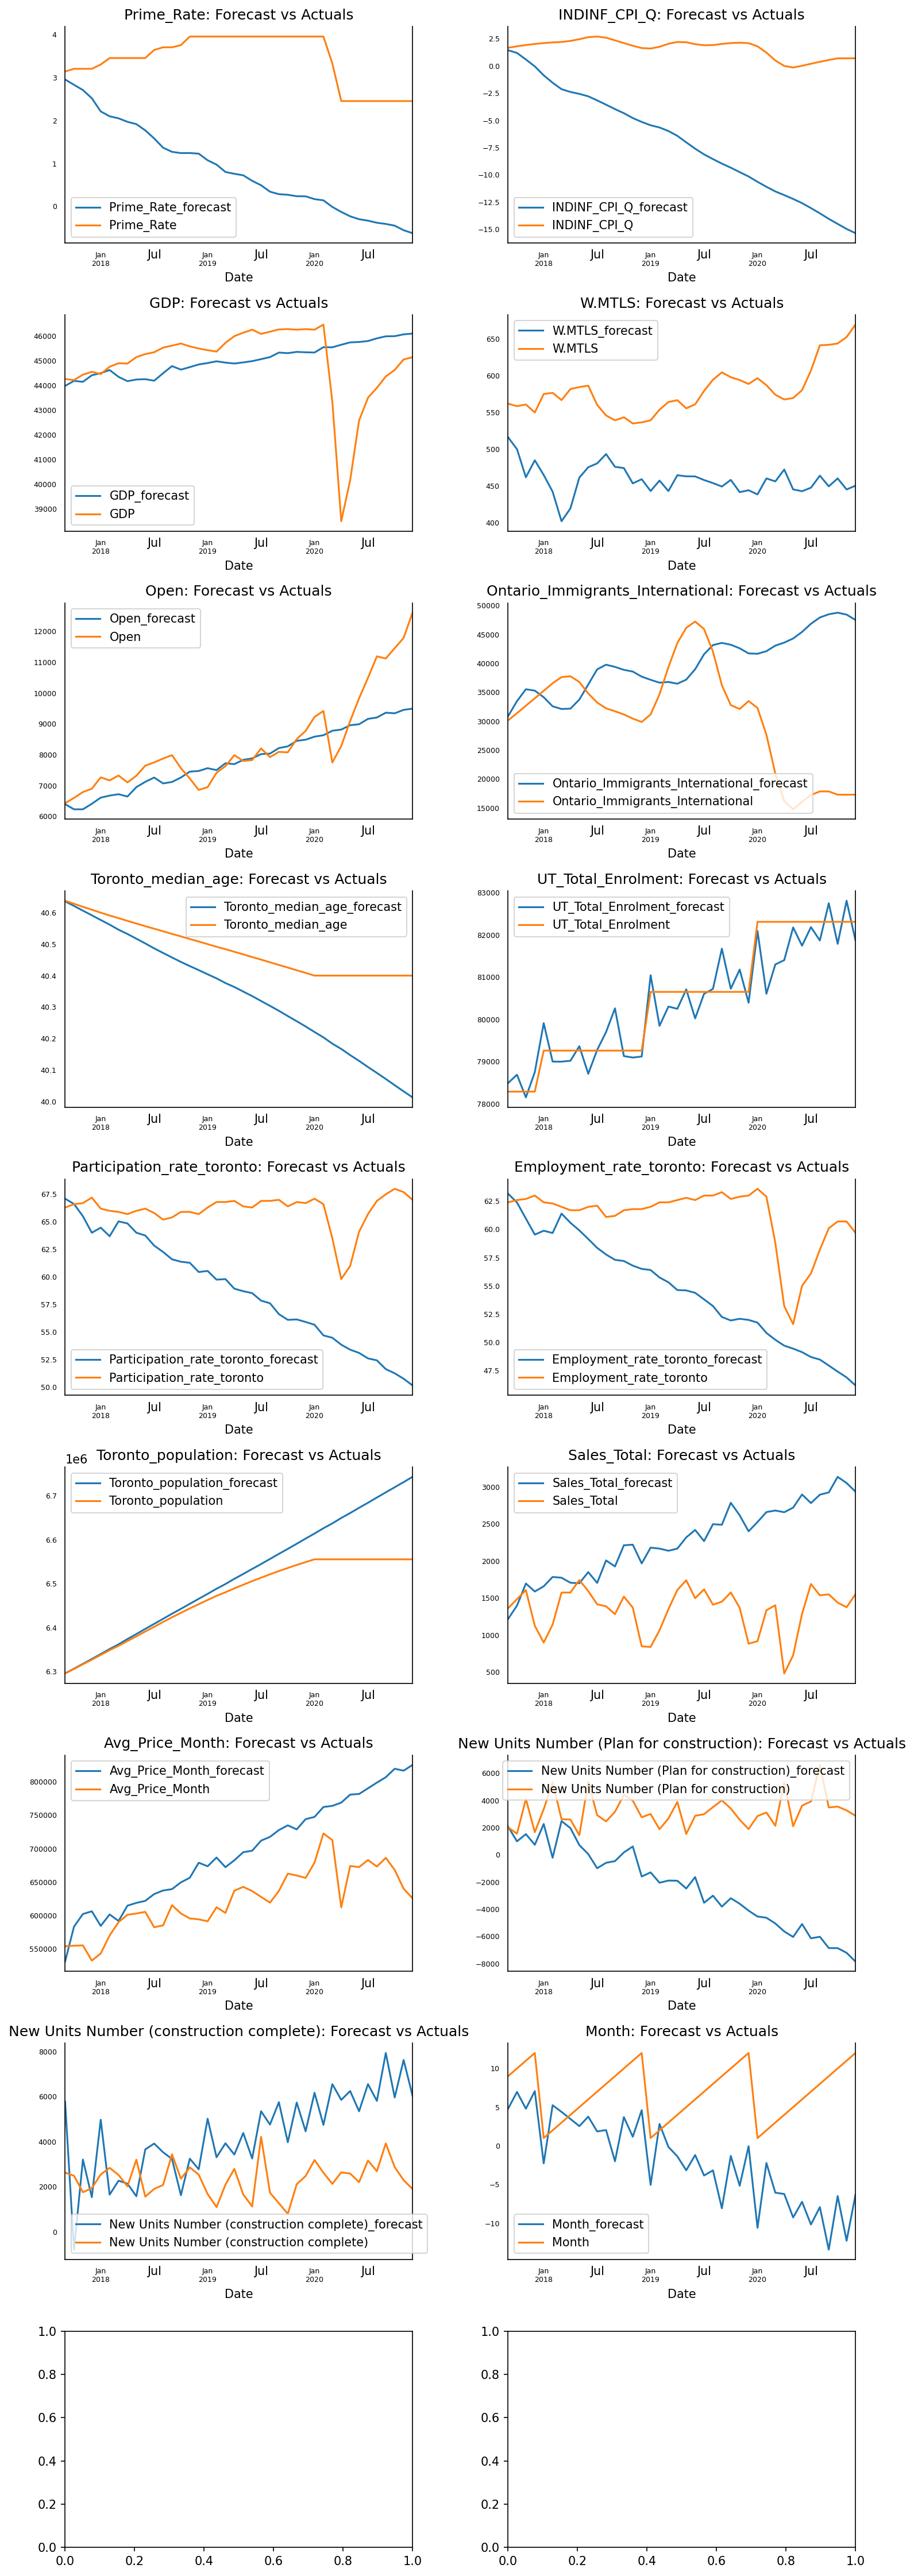

In [47]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, dpi=150, figsize=(10,30))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [48]:
df_results['Avg_Price_Month_forecast']

Date
2017-09-01    531272.622084
2017-10-01    583457.484656
2017-11-01    602318.067553
2017-12-01    606391.984990
2018-01-01    584570.601555
2018-02-01    601684.116410
2018-03-01    591933.051510
2018-04-01    614788.542580
2018-05-01    618957.448977
2018-06-01    621921.125610
2018-07-01    632138.622767
2018-08-01    637446.351987
2018-09-01    639470.424968
2018-10-01    649643.863982
2018-11-01    656480.551789
2018-12-01    678969.904018
2019-01-01    673653.221010
2019-02-01    686706.790728
2019-03-01    672281.916851
2019-04-01    682593.479545
2019-05-01    694700.709383
2019-06-01    696866.541330
2019-07-01    711953.609937
2019-08-01    717580.442436
2019-09-01    727725.982763
2019-10-01    734805.254318
2019-11-01    728730.614339
2019-12-01    744060.561095
2020-01-01    747385.447143
2020-02-01    762178.706089
2020-03-01    763907.185176
2020-04-01    768756.728703
2020-05-01    780744.192099
2020-06-01    781665.843494
2020-07-01    790116.975386
2020-08-01    7

In [49]:
df_test.columns

Index(['Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Ontario_Immigrants_International', 'Toronto_median_age',
       'UT_Total_Enrolment', 'Participation_rate_toronto',
       'Employment_rate_toronto', 'Toronto_population', 'Sales_Total',
       'Avg_Price_Month', 'New Units Number (Plan for construction)',
       'New Units Number (construction complete)', 'Month'],
      dtype='object')

In [50]:
df_final = df_results[['Avg_Price_Month_forecast']].join(df_test[["Avg_Price_Month"]])

In [51]:
df_final

,Avg_Price_Month_forecast,Avg_Price_Month
Date,,
2017-09-01,531272.622084,554068.9743
2017-10-01,583457.484656,555004.0182
2017-11-01,602318.067553,555395.6843
2017-12-01,606391.984990,532700.2853
2018-01-01,584570.601555,543278.6463
2018-02-01,601684.116410,570275.0517
2018-03-01,591933.051510,590184.0477
2018-04-01,614788.542580,601210.9187
2018-05-01,618957.448977,603081.8817


In [52]:
df_test["Avg_Price_Month"]

Date
2017-09-01    554068.9743
2017-10-01    555004.0182
2017-11-01    555395.6843
2017-12-01    532700.2853
2018-01-01    543278.6463
2018-02-01    570275.0517
2018-03-01    590184.0477
2018-04-01    601210.9187
2018-05-01    603081.8817
2018-06-01    605529.6855
2018-07-01    582547.3986
2018-08-01    585355.5893
2018-09-01    615581.6841
2018-10-01    603153.2923
2018-11-01    595677.4423
2018-12-01    594381.5271
2019-01-01    591443.8988
2019-02-01    612488.5451
2019-03-01    603969.0778
2019-04-01    637180.4179
2019-05-01    642890.7171
2019-06-01    636606.4830
2019-07-01    627926.9363
2019-08-01    619306.5482
2019-09-01    636817.5055
2019-10-01    662631.1187
2019-11-01    659855.3180
2019-12-01    656232.5351
2020-01-01    679182.1623
2020-02-01    722674.6517
2020-03-01    712745.8474
2020-04-01    612300.5021
2020-05-01    674028.0977
2020-06-01    672465.0528
2020-07-01    682999.5867
2020-08-01    673173.9453
2020-09-01    686191.4216
2020-10-01    668160.6273
2020-11